In [1]:
%%capture
import jax
import numpy as np
import jax.numpy as jnp
import pyccl as ccl
import matplotlib.pylab as plt

# jax cosmo
from jax_cosmo.core import Cosmology
from jax_cosmo.transfer import BBKS, Eisenstein_Hu
from jax_cosmo.power import linear_matter_power


plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})
figSize  = (12, 8)
fontSize = 12

In [2]:
kvalues = np.logspace(-4, 1, 100)

cosmo_jax = Cosmology(Omega_c=0.25,
                      Omega_b=0.05,
                      h=0.7,
                      sigma8 = 0.8,
                      n_s=0.96,
                      Omega_k=0.,
                      w0=-1.,
                      wa=0.,
                     Neff = 3.044)

## BBKS Method

In [3]:
pklin_bbks = linear_matter_power(cosmo_jax, kvalues / cosmo_jax.h, a = 1.0, transfer_fn=BBKS) / cosmo_jax.h**3

cosmo_ccl_bbks = ccl.Cosmology(Omega_c=0.25,
                          Omega_b=0.05,
                          h=0.7,
                          sigma8 = 0.8,
                          n_s=0.96,
                          Neff = 3.044,
                          transfer_function='bbks')

pklin_ccl_bbks = cosmo_ccl_bbks.linear_matter_power(kvalues, a = 1.0)

## EH Method

In [4]:
pklin_eh = linear_matter_power(cosmo_jax,  kvalues / cosmo_jax.h, a = 1.0, transfer_fn=Eisenstein_Hu) / cosmo_jax.h**3

cosmo_ccl_eh = ccl.Cosmology(Omega_c=0.25,
                          Omega_b=0.05,
                          h=0.7,
                          sigma8 = 0.8,
                          n_s=0.96,
                          Neff = 3.044,
                          transfer_function='eisenstein_hu')

pklin_ccl_eh = cosmo_ccl_eh.linear_matter_power(kvalues, a = 1.0)

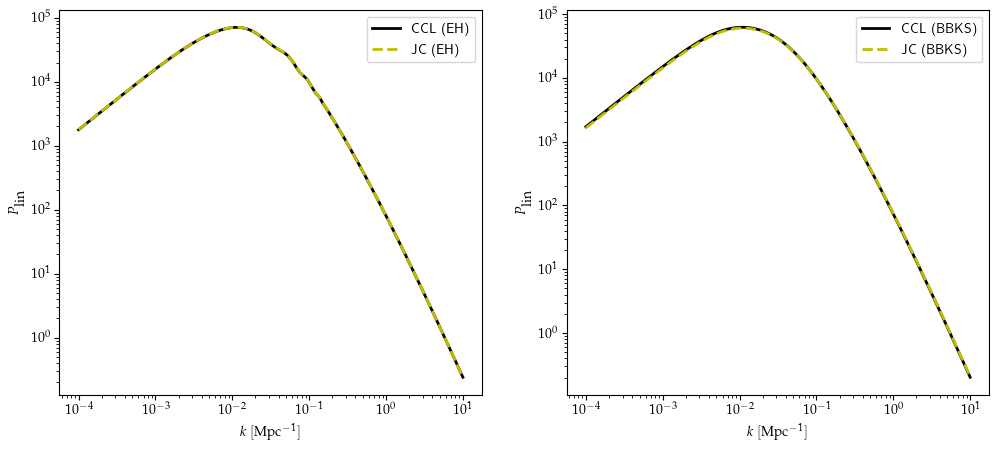

In [5]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(kvalues, pklin_ccl_eh, c = 'k', lw=2, label = 'CCL (EH)')
plt.plot(kvalues, pklin_eh , c = 'y', linestyle = '--', lw = 2, label = 'JC (EH)')
plt.xlabel(r'$k\;[\textrm{Mpc}^{-1}]$')
plt.ylabel(r'$P_{\textrm{lin}}$')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(kvalues, pklin_ccl_bbks, c = 'k', lw=2, label = 'CCL (BBKS)')
plt.plot(kvalues, pklin_bbks, c = 'y', lw=2, linestyle = '--', label = 'JC (BBKS)')
plt.xlabel(r'$k\;[\textrm{Mpc}^{-1}]$')
plt.ylabel(r'$P_{\textrm{lin}}$')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')
plt.show()